In [32]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from torchsummary import summary
import numpy as np
import seaborn as sns

In [26]:
df = pd.read_csv("C:/AI_Dataset/BP_Data.csv", index_col = 0)
df.head()

,Blood_Pressure_Abnormality,Level_of_Hemoglobin,Genetic_Pedigree_Coefficient,Age,BMI,Sex,Pregnancy,Smoking,Physical_activity,salt_content_in_the_diet,alcohol_consumption_per_day,Level_of_Stress,Chronic_kidney_disease,Adrenal_and_thyroid_disorders
Patient_Number,,,,,,,,,,,,,,
1,1,11.28,0.90,34,23,1,1.0,0,45961,48071,NaN,2,1,1
2,0,9.75,0.23,54,33,1,NaN,0,26106,25333,205.0,3,0,0
3,1,10.79,0.91,70,49,0,NaN,0,9995,29465,67.0,2,1,0
4,0,11.00,0.43,71,50,0,NaN,0,10635,7439,242.0,1,1,0
5,1,14.17,0.83,52,19,0,NaN,0,15619,49644,397.0,2,0,0


In [27]:
df.columns

Index(['Blood_Pressure_Abnormality', 'Level_of_Hemoglobin',
       'Genetic_Pedigree_Coefficient', 'Age', 'BMI', 'Sex', 'Pregnancy',
       'Smoking', 'Physical_activity', 'salt_content_in_the_diet',
       'alcohol_consumption_per_day', 'Level_of_Stress',
       'Chronic_kidney_disease', 'Adrenal_and_thyroid_disorders'],
      dtype='object')

고혈압 여부 | 헤모글로빈 수치 | 가족력 여부 | 나이 | BMI | 성별 | 임신 여부 | 흡연 여부 | 신체 활동 지수 | 염분 섭취 수치 | 알코올 섭취량 | 스트레스 지수 | 만성 신장 질환 | 갑상선 장애

In [28]:
df['Blood_Pressure_Abnormality'].value_counts()

Blood_Pressure_Abnormality
0    1013
1     987
Name: count, dtype: int64

In [29]:
df.isnull().sum()

Blood_Pressure_Abnormality          0
Level_of_Hemoglobin                 0
Genetic_Pedigree_Coefficient       92
Age                                 0
BMI                                 0
Sex                                 0
Pregnancy                        1558
Smoking                             0
Physical_activity                   0
salt_content_in_the_diet            0
alcohol_consumption_per_day       242
Level_of_Stress                     0
Chronic_kidney_disease              0
Adrenal_and_thyroid_disorders       0
dtype: int64

In [30]:
# 결측치 제거
mean_value = df['Genetic_Pedigree_Coefficient'].mean()
df['Genetic_Pedigree_Coefficient'] = df['Genetic_Pedigree_Coefficient'].fillna(mean_value)
mean_value = df['alcohol_consumption_per_day'].mean()
df['alcohol_consumption_per_day'] = df['alcohol_consumption_per_day'].fillna(mean_value)
# df = df.drop('Pregnancy', axis = 1)
df['Pregnancy'] = df['Pregnancy'].fillna(0) # 체크하지 않은 사람은 0으로 간주
df.isnull().sum() # 결측치 다시 체크

Blood_Pressure_Abnormality       0
Level_of_Hemoglobin              0
Genetic_Pedigree_Coefficient     0
Age                              0
BMI                              0
Sex                              0
Pregnancy                        0
Smoking                          0
Physical_activity                0
salt_content_in_the_diet         0
alcohol_consumption_per_day      0
Level_of_Stress                  0
Chronic_kidney_disease           0
Adrenal_and_thyroid_disorders    0
dtype: int64

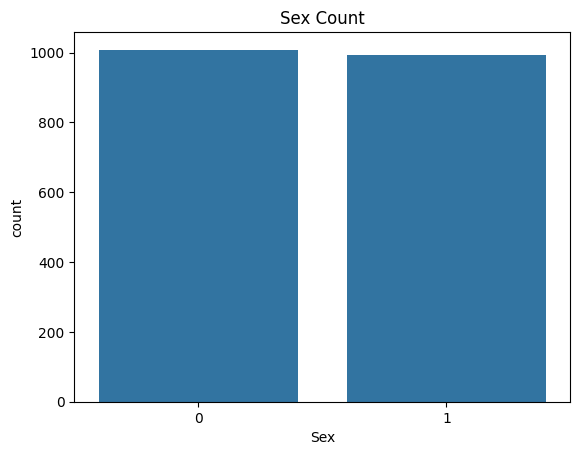

In [34]:
sns.countplot(x='Sex', data=df)
plt.title('Sex Count')
plt.show()

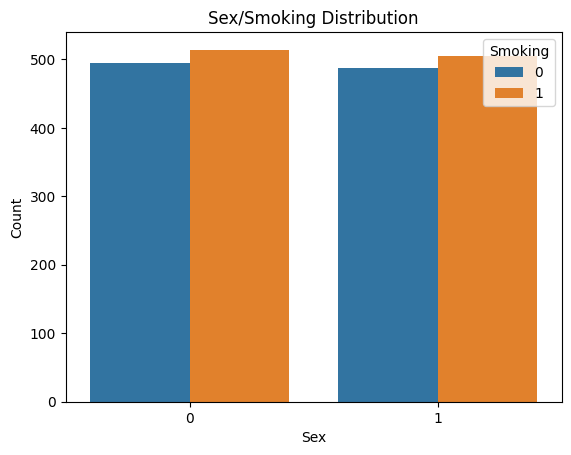

In [36]:
sns.countplot(x='Sex', hue='Smoking', data=df)
plt.title('Sex/Smoking Distribution')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.show()

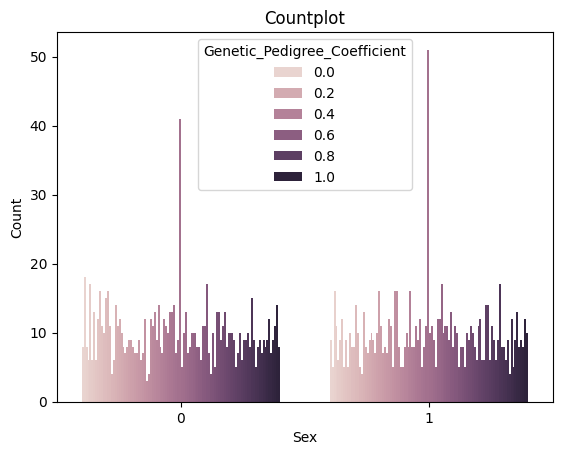

In [37]:
sns.countplot(x='Sex', hue='Genetic_Pedigree_Coefficient', data=df)
plt.title('Countplot')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.show()

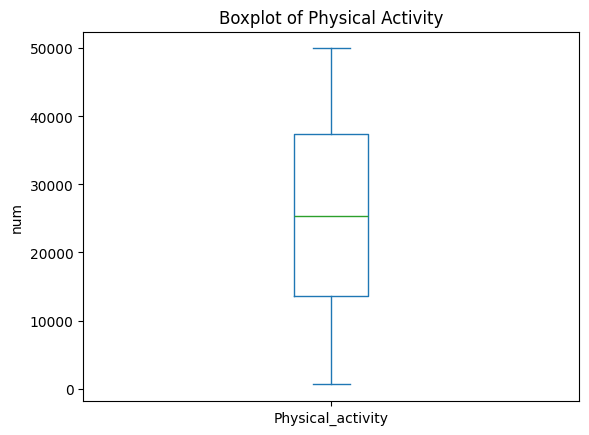

In [39]:
df['Physical_activity'].plot.box()
plt.title('Boxplot of Physical Activity')
plt.ylabel('num')
plt.show()

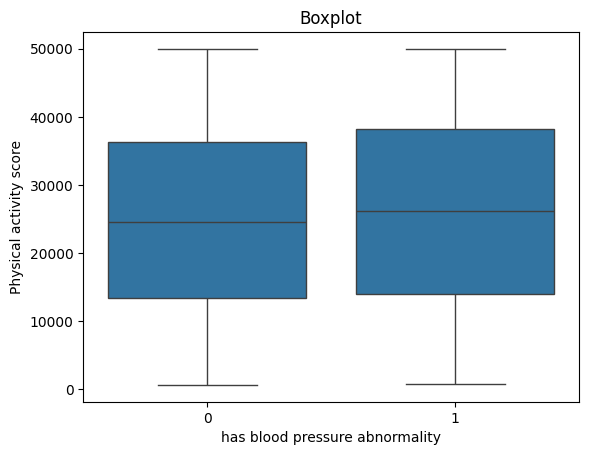

In [41]:
sns.boxplot(x='Blood_Pressure_Abnormality', y='Physical_activity', data=df)
plt.title('Boxplot')
plt.xlabel('has blood pressure abnormality')
plt.ylabel('Physical activity score')
plt.show()

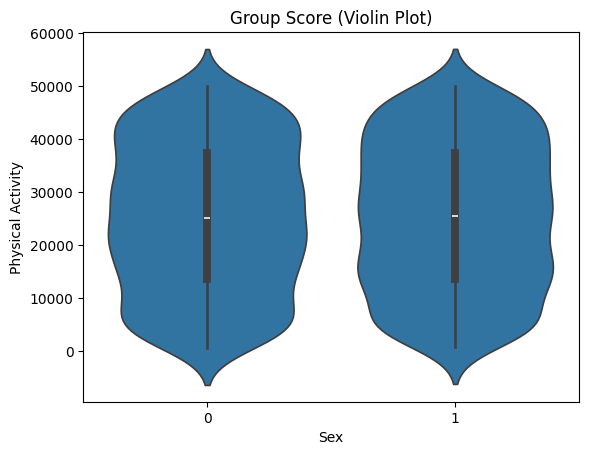

In [43]:
sns.violinplot(x='Sex', y='Physical_activity', data=df)
plt.title('Group Score (Violin Plot)')
plt.xlabel('Sex')
plt.ylabel('Physical Activity')
plt.show()

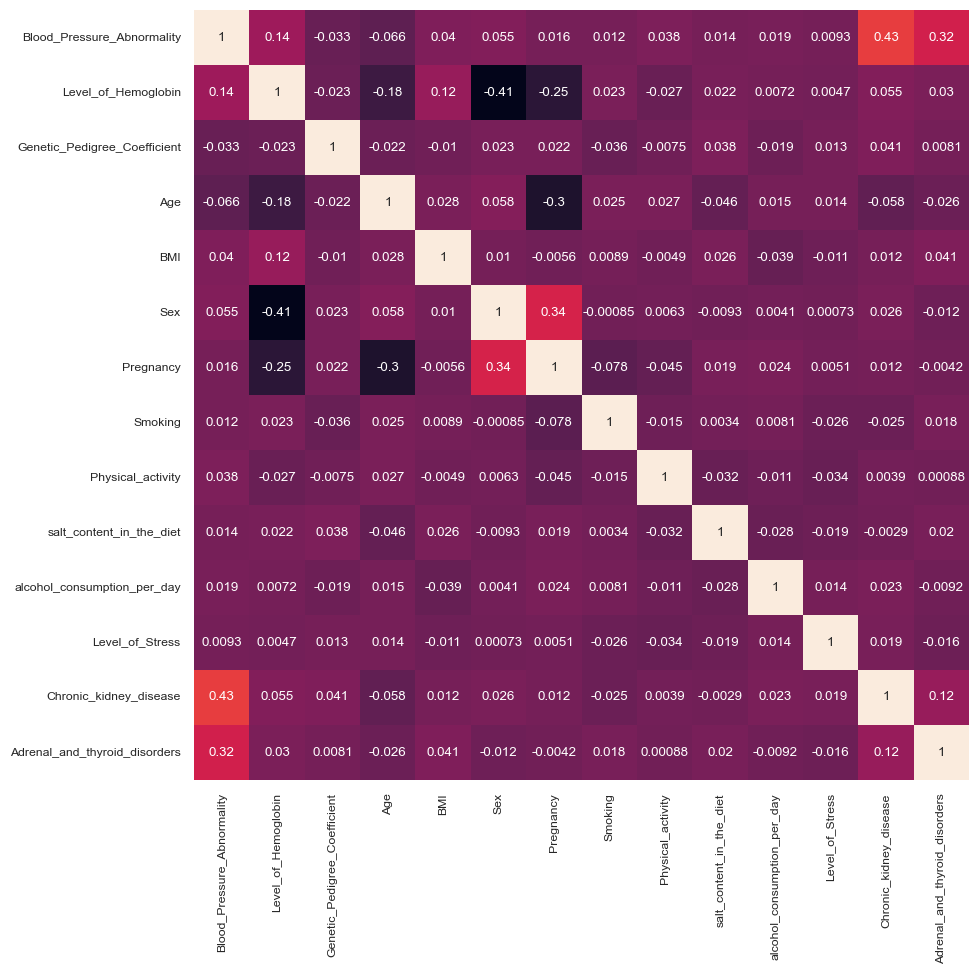

In [44]:
#상관 관계 행렬
# 0.3 이상인 경우 상관관계가 있고, 0.7이상이면 아주 높음

df_corr=df.corr()

#히트맵
plt.figure(figsize=(10,10))
sns.set(font_scale=0.8)
sns.heatmap(df_corr, annot=True, cbar=False)
plt.show()

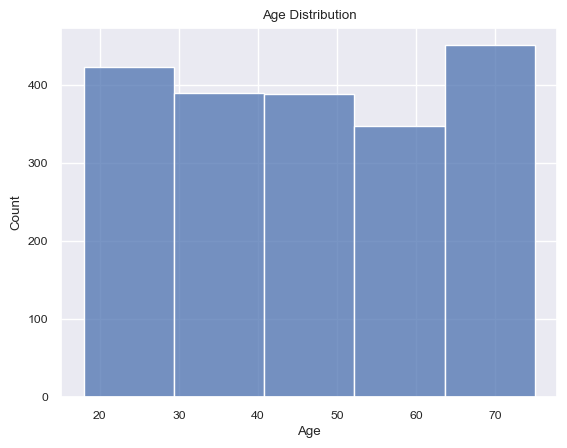

In [47]:
# Age 컬럼의 히스토그램
sns.histplot(df['Age'], bins=5, kde=False)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

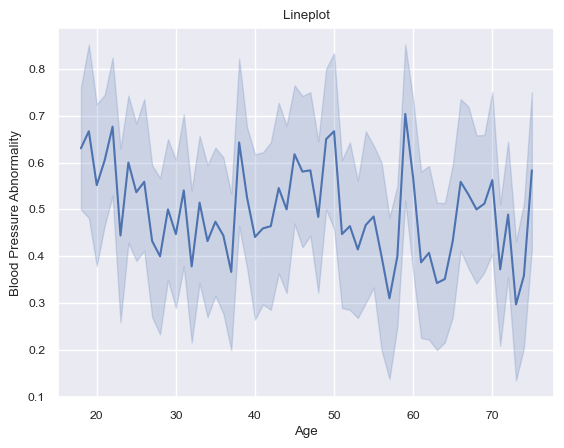

In [54]:
sns.lineplot(x='Age', y='Blood_Pressure_Abnormality', data=df)
plt.title('Lineplot')
plt.xlabel('Age')
plt.ylabel('Blood Pressure Abnormality')
plt.show()

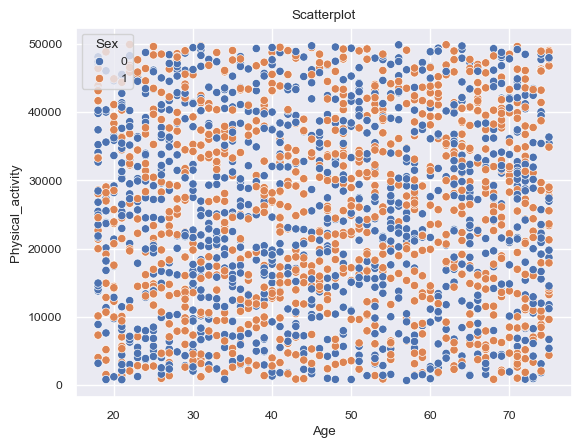

In [55]:
sns.scatterplot(x='Age', y='Physical_activity', hue = 'Sex', data=df)
plt.title('Scatterplot')
# plt.xlabel('Age')
# plt.ylabel('BMI')
plt.show()

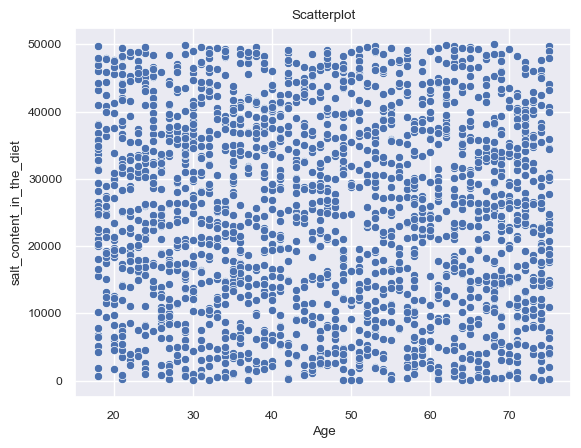

In [58]:
sns.scatterplot(x='Age', y='salt_content_in_the_diet', data=df)
plt.title('Scatterplot')
plt.show()

In [13]:
# 데이터와 타겟 분리
X = df.drop('Blood_Pressure_Abnormality', axis=1).values
y = df['Blood_Pressure_Abnormality'].values

In [14]:
# Standardize the data
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1600, 12), (400, 12), (1600,), (400,))

In [16]:
# Convert to PyTorch tensors
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.int64)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.int64)

In [17]:
# Create DataLoader
train_dataset = TensorDataset(X_train, y_train)
train_dataloader = DataLoader(train_dataset, batch_size=32, shuffle=True)

test_dataset = TensorDataset(X_test, y_test)
test_dataloader = DataLoader(test_dataset, batch_size=32, shuffle=False)

In [18]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

(torch.Size([1600, 12]),
 torch.Size([400, 12]),
 torch.Size([1600]),
 torch.Size([400]))

In [21]:
class BPEvaluationBinary(nn.Module):
    def __init__(self):
        super(BPEvaluationBinary, self).__init__()
        self.fc1 = nn.Linear(12, 64) # 6에서 8로 고침
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 1)
    
    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x


In [22]:
model = BPEvaluationBinary()

criterion = nn.BCEWithLogitsLoss()

optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [23]:
# Variables to store loss and accuracy
train_losses = []
test_accuracies = []

# Training loop
num_epochs = 30
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for inputs, labels in train_dataloader:
        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model(inputs)
        loss = criterion(outputs, labels.unsqueeze(1).float())

        # Backward pass and optimize
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    # Calculate average loss over an epoch
    train_losses.append(running_loss / len(train_dataloader))

    # Evaluate on test data
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in test_dataloader:
            outputs = model(inputs)
            # _, predicted = torch.max(outputs.data, 1)
            predicted = (torch.sigmoid(outputs) > 0.5).long()
            # print(torch.sigmoid(outputs)[:10]) # 테스트 코드
            labels = labels.view(-1, 1)
            total += labels.size(0)
            correct += (predicted == labels.long()).sum().item()

    accuracy = 100 * correct / total
    test_accuracies.append(accuracy)

    print(f"Epoch {epoch + 1}/{num_epochs}, Loss: {train_losses[-1]:.4f}, Accuracy: {accuracy:.2f}%")

print("Training complete.")

Epoch 1/30, Loss: 0.5385, Accuracy: 81.00%
Epoch 2/30, Loss: 0.3744, Accuracy: 84.75%
Epoch 3/30, Loss: 0.3346, Accuracy: 86.75%
Epoch 4/30, Loss: 0.3064, Accuracy: 84.75%
Epoch 5/30, Loss: 0.3007, Accuracy: 85.50%
Epoch 6/30, Loss: 0.2770, Accuracy: 86.00%
Epoch 7/30, Loss: 0.2769, Accuracy: 86.25%
Epoch 8/30, Loss: 0.2642, Accuracy: 85.75%
Epoch 9/30, Loss: 0.2703, Accuracy: 85.00%
Epoch 10/30, Loss: 0.2523, Accuracy: 85.50%
Epoch 11/30, Loss: 0.2485, Accuracy: 87.25%
Epoch 12/30, Loss: 0.2554, Accuracy: 86.75%
Epoch 13/30, Loss: 0.2317, Accuracy: 85.75%
Epoch 14/30, Loss: 0.2181, Accuracy: 85.50%
Epoch 15/30, Loss: 0.2189, Accuracy: 86.00%
Epoch 16/30, Loss: 0.2164, Accuracy: 86.50%
Epoch 17/30, Loss: 0.2271, Accuracy: 83.75%
Epoch 18/30, Loss: 0.2058, Accuracy: 87.50%
Epoch 19/30, Loss: 0.1902, Accuracy: 86.25%
Epoch 20/30, Loss: 0.1800, Accuracy: 85.50%
Epoch 21/30, Loss: 0.1646, Accuracy: 88.50%
Epoch 22/30, Loss: 0.1589, Accuracy: 87.75%
Epoch 23/30, Loss: 0.1555, Accuracy: 85.0

In [24]:
# Evaluation
model.eval()
all_labels = []
all_predictions = []
with torch.no_grad():
    for inputs, labels in test_dataloader:
        outputs = model(inputs)
        # _, predicted = torch.max(outputs.data, 1)
        predicted = (torch.sigmoid(outputs) > 0.5).long()
        all_labels.extend(labels.cpu().numpy())
        all_predictions.extend(predicted.cpu().numpy())

# Convert to numpy arrays
all_labels = np.array(all_labels)
all_predictions = np.array(all_predictions)
#print(all_labels) # 디버그 코드
#print(all_predictions)
# Calculate metrics
conf_matrix = confusion_matrix(all_labels, all_predictions)
f1 = f1_score(all_labels, all_predictions, average='weighted')
precision = precision_score(all_labels, all_predictions, average='weighted')
recall = recall_score(all_labels, all_predictions, average='weighted')

# Calculate specificity for each class
specificity = []
for i in range(conf_matrix.shape[0]):
    tn = conf_matrix.sum() - (conf_matrix[i, :].sum() + conf_matrix[:, i].sum() - conf_matrix[i, i])
    fp = conf_matrix[:, i].sum() - conf_matrix[i, i]
    specificity.append(tn / (tn + fp))

print(f'Confusion Matrix:\n{conf_matrix}')
print(f'F1 Score: {f1:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'Specificity: {np.mean(specificity):.2f}')

Confusion Matrix:
[[185  38]
 [ 24 153]]
F1 Score: 0.85
Precision: 0.85
Recall: 0.84
Specificity: 0.85


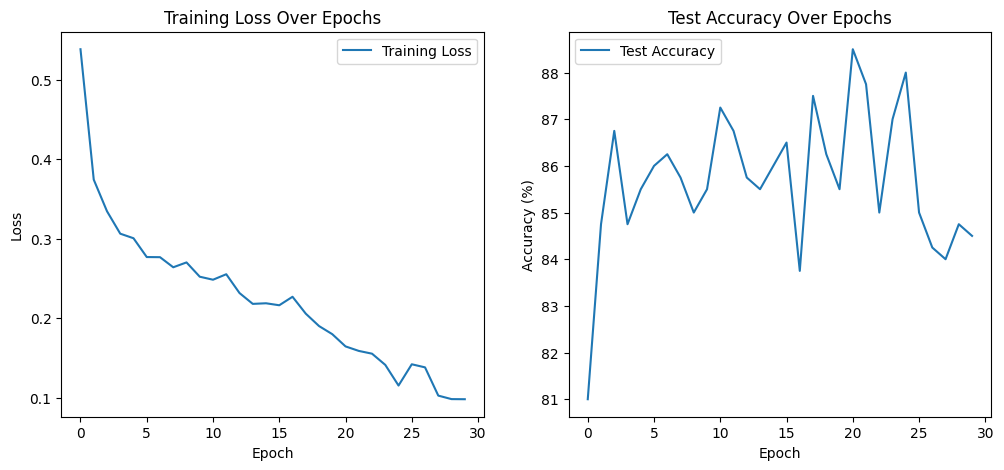

In [25]:
# Plot the loss and accuracy
plt.figure(figsize=(12, 5))

# Plot loss
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss Over Epochs')
plt.legend()

# Plot accuracy
plt.subplot(1, 2, 2)
plt.plot(test_accuracies, label='Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.title('Test Accuracy Over Epochs')
plt.legend()

plt.show()